In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Introduction of Dataset
### This dataset contain csv file of Crime Article.

### Problem: India is a country of 1.3 billion people. Some cases are continuing for 108 years.

### Solution: So faster judging process would help people in a great way. So this dataset can be for            recommendation to the lawyers and judges.

### Helping Judges: Judges may give the verdict sooner as they knew similar cases which has been happened.

### Helping Lawyers: Lawyers would get aware through the recent cases through the recommendation, which has been happened. So they can give this example at the time of arguing.

In [2]:
df=pd.read_csv("7k  Unique crime articles.csv")

### WE will check the head of dataframe.

In [3]:
df.head()

,heading,content_summary,article_link,img_link,month_date,time,Year
0,"Uttarakhand: Man, 39, held for killing consta...",Nainital district police on Monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,09:55,2022
1,"Nashik city: Another theft from parked car, s...",Thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,08:25,2022
2,Pune: Externed criminal jumps from bus fearin...,An externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,05:17,2022
3,Gaya woman burned alive on suspicion of witch...,A middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/patna...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 06,05:24,2022
4,Man held on charge of stalking in Pune,A man (33) was arrested on Tuesday from Khed ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 03,08:32,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   heading          7617 non-null   object
 1   content_summary  7617 non-null   object
 2   article_link     7617 non-null   object
 3   img_link         7617 non-null   object
 4   month_date       7617 non-null   object
 5   time             7617 non-null   object
 6   Year             7617 non-null   object
dtypes: object(7)
memory usage: 416.7+ KB


### We will check now whether any null value present in dataset or not.

In [5]:
df.isnull().sum()

heading            0
content_summary    0
article_link       0
img_link           0
month_date         0
time               0
Year               0
dtype: int64

In [6]:
df.columns

Index(['heading', 'content_summary', 'article_link', 'img_link', 'month_date',
       'time', 'Year'],
      dtype='object')

In [7]:
empty_indx=[]
for indx, heading, content_summary,article_link,img_link,month_date,time,year in df.itertuples():
  if type(heading)==str:
    if heading.isspace():
      empty_indx.append(indx)
print(empty_indx)

[]


### From above we can seen that there is no null value present in the dataset.

### Making some plot to understand our dataset.

In [8]:
df["heading_len"] = df["heading"].str.len()

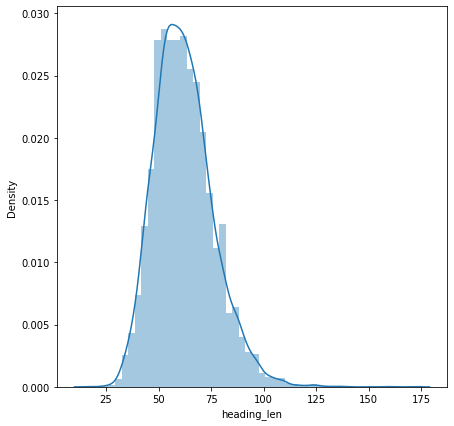

In [28]:
plt.figure(figsize=(7,7))
sns.distplot(df["heading_len"])
plt.show()


<AxesSubplot:xlabel='heading_len', ylabel='Count'>

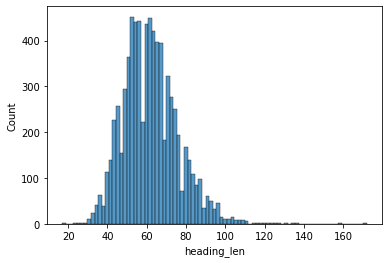

In [29]:
sns.histplot(data=df,x=df["heading_len"])

In [9]:
df["word_count"]=df["heading"].str.split().apply(len)


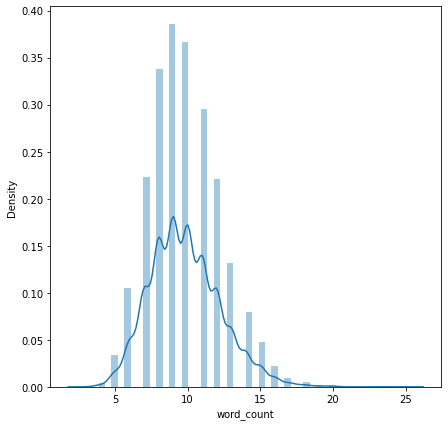

In [30]:
plt.figure(figsize=(7,7))
sns.distplot(df["word_count"])
plt.show()


<AxesSubplot:xlabel='word_count', ylabel='Count'>

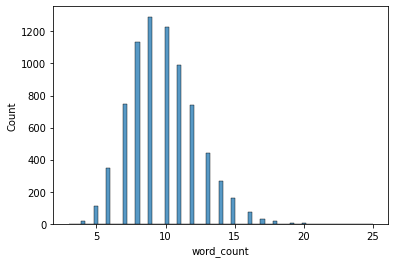

In [31]:
sns.histplot(data=df,x=df["word_count"])

In [10]:
def avg_word_len(x):
  words=x.split()
  word_len=0
  for i in words:
    word_len=word_len+len(i)
  return word_len/len(words)

In [11]:
df["avg_word_len"]=df["heading"].apply(avg_word_len)

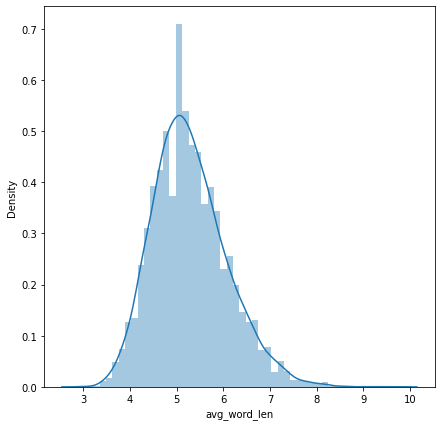

In [32]:
plt.figure(figsize=(7,7))
sns.distplot(df["avg_word_len"])
plt.show()

<AxesSubplot:xlabel='avg_word_len', ylabel='Count'>

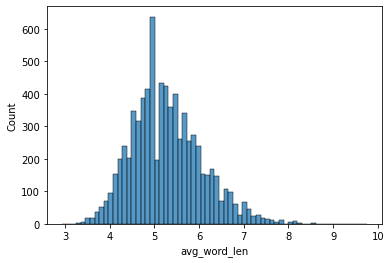

In [33]:
sns.histplot(data=df,x=df["avg_word_len"])

### From above all graph we can say that our data is almost normally distributed.

### We will now import nltk and it's library as well dependancies.

In [34]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Now we will do some preprocessing for cleaning the text.

In [35]:
def clean_text(text):
  token=word_tokenize(text.lower())
  ftoken=[i for i in token if i.isalpha()]
  stpwd=stopwords.words("english")
  stoken=[i for i in ftoken if i not in stpwd ]
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stoken]
  return " ".join(ltoken)

In [36]:
df["heading"]=df["heading"].astype(str)

In [37]:
df["clean_heading"]=df["heading"].apply(clean_text)

### We have cleaned our text. We once check our dataframe now.

In [38]:
df.head()

,heading,content_summary,article_link,img_link,month_date,time,Year,heading_len,word_count,avg_word_len,clean_heading
0,"Uttarakhand: Man, 39, held for killing consta...",Nainital district police on Monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,09:55,2022,69,10,5.800000,uttarakhand man held killing constable wife ha...
1,"Nashik city: Another theft from parked car, s...",Thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,08:25,2022,68,12,4.583333,nashik city another theft parked car seventh c...
2,Pune: Externed criminal jumps from bus fearin...,An externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 08,05:17,2022,72,12,4.916667,pune externed criminal jump bus fearing cop ca...
3,Gaya woman burned alive on suspicion of witch...,A middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/patna...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 06,05:24,2022,52,8,5.375000,gaya woman burned alive suspicion witchcraft
4,Man held on charge of stalking in Pune,A man (33) was arrested on Tuesday from Khed ...,https://timesofindia.indiatimes.com/city/pune/...,https://static.toiimg.com/thumb/imgsize-123456...,Nov 03,08:32,2022,40,8,3.875000,man held charge stalking pune


### Will perform vectorization now.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
vectors=cv.fit_transform(df["clean_heading"]).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

### Finding similarities between vectors.

In [41]:
similarity=cosine_similarity(vectors)

### Acessing other similar element to "5th heading"

In [42]:
similarity[5]

array([0.        , 0.        , 0.22222222, ..., 0.        , 0.        ,
       0.        ])

### Building recommendaion function.

In [43]:
def recommend(tag):
    
    heading_index=df[df["clean_heading"]==tag].index[0]
    distances=similarity[heading_index]
    heading_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in heading_list:
      print(df.iloc[i[0]].clean_heading)
    

In [44]:
df["clean_heading"][0]

'uttarakhand man held killing constable wife haldwani'

### Will check for 5 similar type of heading.

In [45]:
recommend('uttarakhand man held killing constable wife haldwani')

uttarakhand man held killing constable wife u nagar
pune man held killing wife
delhi man held killing wife partner
man held killing wife front child
navi mumbai man held killing wife arrested


### We successfully build our article recommendation system. We could observe that now it is recommending top 5 related crime articles.

### We will now build the web app to recommend related crime article for the user. For that we will pickle file of count vectorizer and dataframe of dataset.

In [1]:
import pickle

In [ ]:
pickle.dump(cv,open("cntvect.pkl","wb"))

In [ ]:
pickle.dump(df,open("df.pkl","wb"))